<center><h1> Data Visualization Project</h1><br>
</center><br>


The primary goal of this project is to create an interactive and insightful visualization system that helps various users gain a comprehensive understanding of traffic crashes resulting in injuries in San Francisco. By transforming raw data into visual representations, we aim to offer valuable insights into the patterns, severity, and
contributing factors of these incidents. This system will serve as a vital tool for traffic safety analysis, policy evaluation, and public awareness.

For instance, during rainy conditions when roads become slippery, there is an increase in the occurrence of serious accidents. Through further analysis, we can gain insights into the types of vehicles involved and their impact on accident rates. This information can inform strategies to improve the overall safety of San Francisco's roadways and transport.

#### Questions we aim to answer:

1. How severe were the injuries incurred by the parties based on various factors?
2. What are the most common types of traffic crashes? (front-impact, side-impact etc)
3. Which vehicle brands were rather involved in the traffic crashes?
4. How does the lighting in the area affect the crashes?
5. What are the major factors causing crashes?
6. What were the prime locations of accidents in San Francisco?
7. How helpful were the safety equipment to contain the severity of the accident?
8. How does the severity of injuries relate with the type of motor vehicles involved in the crashes? (like larger vehicles more likely to result in severe injuries than accidents involving smaller vehicles?)
9. Are there common causes or violations that lead to more severe injuries?
10. The timeline of traffic accidents from different time perspectives? What is the date, month or year where most accidents happen?
11. Is there a relationship between accident data and weather data?
    Are there any significant correlations between the characteristics of the drivers (age, driver's license status, gender) and the accident?

#### Target Users:

● Law enforcement officers can use our system to determine the changes and updates required to reduce or avoid accidents in accident-prone areas.

● General public can use our visualization system so that they can avoid or be careful at accident prone areas.

● Real estate agents can use our system to decide property rates based on the areas.

● Activists and Advocates can use our system to help parties involved.

● The Department of Transportation can use our system to determine the updates required to the area prone to accidents.


### Pip installs


In [ ]:
! pip install folium --upgrade
! pip install bokeh
! pip install geojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


### Implementation


In [ ]:
# neccessary imports
import pandas as pd
import folium
from math import pi
import plotly.express as px
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
import bokeh.io
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
import geojson
from google.colab import drive
drive.mount('/content/drive')

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/san-francisco.geojson') as f:
    sf_geojson = geojson.load(f)


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Traffic_Crashes_Resulting_in_Injury__Victims_Involved_20231105.csv")
data.head()

<ipython-input-3-2fed67f73ff2>:5: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Traffic_Crashes_Resulting_in_Injury__Victims_Involved_20231105.csv")


,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,victim_ejected,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,35661,23502000,12422000.0,3703657,37.741777,-122.504343,SFPD-CROSSROADS,CITY STREET,02/28/2008 01:20:00 PM,02/28/2008 12:00:00 AM,...,Unknown,POINT (-122.50434 37.741776),02/28/2008 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:39:24 AM,39.0,39.0,10.0,7.0,35.0
1,20723,22192000,NaN,150813353,37.723080,-122.452332,SFPD-CROSSROADS,CITY STREET,09/16/2015 01:57:00 PM,09/16/2015 12:00:00 AM,...,Fully Ejected,POINT (-122.45233 37.72308),09/16/2015 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:39:27 AM,95.0,95.0,10.0,8.0,24.0
2,50253,32859000,184101.0,150866857,NaN,NaN,SFPD-CROSSROADS,CITY STREET,10/03/2015 02:36:00 PM,10/03/2015 12:00:00 AM,...,Unknown,NaN,10/03/2015 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:41:06 AM,NaN,NaN,NaN,NaN,NaN
3,43672,25928000,6558000.0,6076593,37.777599,-122.424834,SFPD-CROSSROADS,CITY STREET,05/06/2012 03:13:00 PM,05/06/2012 12:00:00 AM,...,Unknown,POINT (-122.424835 37.7776),05/06/2012 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:38:37 AM,22.0,22.0,4.0,11.0,9.0
4,491742,25186000,NaN,230167266,37.782894,-122.420817,SFPD-INTERIM DB,CITY STREET,03/09/2023 05:33:00 AM,03/09/2023 12:00:00 AM,...,Not Stated,POINT (-122.420815 37.782894),05/02/2023 12:00:00 AM,05/02/2023 12:00:00 AM,09/30/2023 03:39:30 AM,20.0,20.0,4.0,10.0,36.0


### 1. How severe were the injuries incurred by the parties based on various factors?


In [ ]:
# heatmap


"""weather v/s collision severity"""

# setting column names
weather_col = 'Weather'
severity_col = 'Collision Severity'
count_col = 'Count'


# setting up data
cond_severity_df = data[['weather_1', 'collision_severity']]
grouped_cond_severity_df = cond_severity_df.groupby(['weather_1', 'collision_severity']).value_counts().reset_index(name=count_col)
grouped_cond_severity_df.columns = [weather_col, severity_col, count_col]
grouped_cond_severity_df

fig = go.Figure(data=[go.Heatmap(x=grouped_cond_severity_df[weather_col],
                                 y=grouped_cond_severity_df[severity_col],
                                 z=grouped_cond_severity_df[count_col])])

fig.show()


In [ ]:
"""road surface v/s collision severity"""

# setting column names
road_col = 'Road Surface'
severity_col = 'Collision Severity'
count_col = 'Count'


# setting up data
cond_severity_df = data[['road_surface', 'collision_severity']]
grouped_cond_severity_df = cond_severity_df.groupby(['road_surface', 'collision_severity']).value_counts().reset_index(name=count_col)
grouped_cond_severity_df.columns = [road_col, severity_col, count_col]

fig = go.Figure(data=[go.Heatmap(x=grouped_cond_severity_df[road_col],
                                 y=grouped_cond_severity_df[severity_col],
                                 z=grouped_cond_severity_df[count_col])])

fig.show()


### 2. What are the most common types of traffic crashes? (front-impact, side-impact, etc)


In [ ]:
# pie chart

# setting up the data as input for bokeh's pie chart function
type_of_crash_df = data['type_of_collision'].value_counts()

type_of_crash_df = pd.Series(type_of_crash_df).reset_index(name='value').rename(columns={'index': 'type_of_collision'})
type_of_crash_df['angle'] = type_of_crash_df['value']/type_of_crash_df['value'].sum() * 2*pi
type_of_crash_df['color'] = Category20c[len(type_of_crash_df)]


# making a bokeh figure
p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@type_of_collision: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='type_of_collision', source=type_of_crash_df)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None


# displaying pie chart
show(p)

### 3. Which vehicle brands were rather involved in the traffic crashes?


In [ ]:
# bar chart

# setting up column names
brand_col = 'Vehicle Brand'
count_col = 'Count'


# setting up the data
vehicle_make_df = data['vehicle_make'].fillna('Not specified').replace({'-': 'Not specified'}).value_counts().rename_axis(brand_col).reset_index(name=count_col)


# ignoring small values
updated_vehicle_make_df = vehicle_make_df[vehicle_make_df[count_col] >= 200]

print("Considering {} values out of {}".format(sum(updated_vehicle_make_df[count_col]), len(data)))


# plotting bar chart
fig = px.bar(updated_vehicle_make_df, x=brand_col, y=count_col)
fig.show()

Considering 51474 values out of 71204


### 4. How does the lighting in the area affect the crashes?


In [ ]:
# line chart

# setting up column names
accident_year_col = 'Accident Year'
lighting_col = 'Lighting Condition'
count_col = 'Count'


# setting up the required data
lighting_count_df = data[['accident_year', 'lighting']]
grouped_lighting_count_df = lighting_count_df.groupby(['lighting', 'accident_year']).value_counts().reset_index(name=count_col)
grouped_lighting_count_df.columns = [lighting_col, accident_year_col, count_col]


# plotting the line chart
fig = px.line(grouped_lighting_count_df, x=accident_year_col, y=count_col, color=lighting_col, line_shape="spline")
fig.show()

### 5. What are the major parties who are at fault?


In [ ]:
# grouped bar chart

# setting up column names
party_type_col = 'Party Type'
at_fault_col = 'At Fault'
count_col = 'Count'


# setting up data
fault_parties_df = data[['party_type', 'at_fault']]
grouped_fault_parties_df = fault_parties_df.groupby(['party_type', 'at_fault']).value_counts().reset_index(name=count_col)
grouped_fault_parties_df.columns = [party_type_col, at_fault_col, count_col]

unique_party_types = grouped_fault_parties_df[party_type_col].unique().tolist()

at_fault_yes_list = grouped_fault_parties_df[grouped_fault_parties_df[at_fault_col] == 'Yes']
at_fault_no_list = grouped_fault_parties_df[grouped_fault_parties_df[at_fault_col] == 'No']


# plotting grouped bar chart
fig = go.Figure(data=[
    go.Bar(name=f'{at_fault_col} - Yes', x=unique_party_types, y=at_fault_yes_list[count_col]),
    go.Bar(name=f'{at_fault_col} - No', x=unique_party_types, y=at_fault_no_list[count_col])]
    )


# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### 6. What were the prime locations of accidents in San Francisco?


In [ ]:
# getting latitude and longitude
locations = list(zip(data['tb_latitude'].dropna(), data['tb_longitude'].dropna()))
print("Locations sample: ", locations[:5])
print("Number of valid locations: ", len(locations))

Locations sample:  [(37.7417772606558, -122.504342584002), (37.7230802422331, -122.452331560824), (37.7775985956986, -122.424833999267), (37.78289412149, -122.420817003265), (37.7703485171713, -122.409735888977)]
Number of valid locations:  71022


In [ ]:
# Extract the latitude and longitude values
latitudes = data["tb_latitude"]
longitudes = data["tb_longitude"]

# Create a DataFrame with the latitude and longitude values
map_data = pd.DataFrame({"latitude": latitudes, "longitude": longitudes})
map_data = map_data.dropna()

# Cluster the data using k-means clustering
kmeans = KMeans(n_clusters=20)
kmeans.fit(map_data)

# Assign each location to a cluster
cluster_labels = kmeans.labels_

count_label = {}

for i in cluster_labels:
  if i not in count_label.keys():
    count_label[i] = 0
  count_label[i] += 1

sorted(count_label, key=lambda key: key)


centers = kmeans.cluster_centers_

# Create a map
map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add central locations of the clusters to the map
for i, each_loc in enumerate(centers):
    location = tuple(each_loc)
    marker = folium.Marker(location, popup="Count: " + str(count_label[i]))
    map.add_child(marker)


# Display the map
map

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



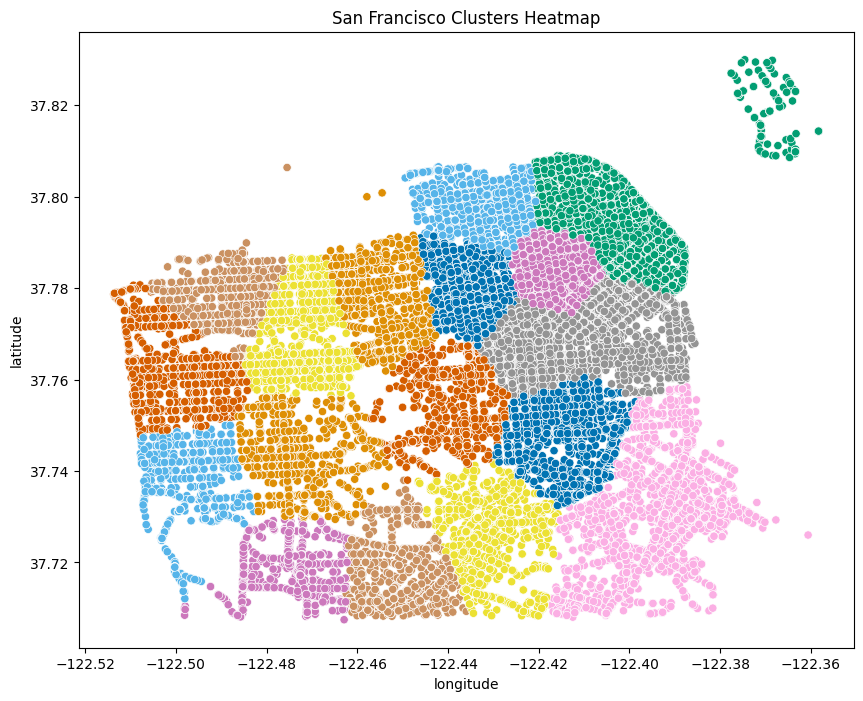

In [ ]:
import folium
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a folium map with cluster borders
def create_cluster_map(map_data, n_clusters):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    map_data['cluster'] = kmeans.fit_predict(map_data[['latitude', 'longitude']])

    # Create a folium map centered at San Francisco
    sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

    # Create cluster borders
    for cluster in range(n_clusters):
        cluster_data = map_data[map_data['cluster'] == cluster]
        for _, row in cluster_data.iterrows():
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=5,
                color='black',
                fill=True,
                fill_color='black',
                fill_opacity=0.7,
            ).add_to(sf_map)

    return sf_map, map_data

# Function to create a heatmap
def create_heatmap(map_data):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='longitude', y='latitude', data=map_data, hue=map_data['cluster'], palette='colorblind', legend=False)
    plt.title('San Francisco Clusters Heatmap')
    plt.show()

# Example usage
# Replace 'your_data.csv' with the path to your CSV file containing latitude and longitude data
latitudes = data["tb_latitude"]
longitudes = data["tb_longitude"]

# Create a DataFrame with the latitude and longitude values
map_data = pd.DataFrame({"latitude": latitudes, "longitude": longitudes})
map_data = map_data.dropna()

# Specify the number of clusters
n_clusters = 20

# Create and save the cluster map
cluster_map, map_data = create_cluster_map(map_data.copy(), n_clusters)
cluster_map.save('cluster_map.html')

# Create and display the heatmap
create_heatmap(map_data)


### 7. How helpful were the safety equipment to contain the severity of the accident?


In [ ]:
# stacked bar chart

# setting column names
severity_col = 'Collision Severity'
safety_col = 'Safety Equipment Used'
count_col = 'Count'


# setting up the data
severity_safety_corr_df = data[['collision_severity', 'party_safety_equip_1']]
grouped_severity_safety_corr_df = severity_safety_corr_df.groupby(['collision_severity', 'party_safety_equip_1']).value_counts().reset_index(name=count_col)
grouped_severity_safety_corr_df.columns = [severity_col, safety_col, count_col]

unique_safety_equips = grouped_severity_safety_corr_df[safety_col].unique().tolist()

unique_severity = grouped_severity_safety_corr_df[severity_col].unique().tolist()


# setting data for figure
figure_data = []

for each_severity in unique_severity:
  list_of_counts = grouped_severity_safety_corr_df[grouped_severity_safety_corr_df[severity_col] == each_severity][count_col]
  figure_data.append(go.Bar(name=each_severity, x=unique_safety_equips, y=list_of_counts))


# plotting the stacked bar chart
fig = go.Figure(data=figure_data)


# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

### 8. How does the severity of injuries relate to the type of motor vehicles involved in the crashes?


In [ ]:
# scatter plot

# setting column names
injured_col = 'No. of injuries'
vehicle_type_col = 'Vehicle Type'
severity_col = 'Collision Severity'


# setting up the data
injuries_vehicle_type_corr_df = data[['party_number_injured', 'stwd_vehicle_type', 'collision_severity']]
grouped_injuries_vehicle_type_df = injuries_vehicle_type_corr_df.groupby(['stwd_vehicle_type', 'collision_severity'])['party_number_injured'].sum().reset_index()
grouped_injuries_vehicle_type_df.columns = [vehicle_type_col, severity_col, injured_col]
grouped_injuries_vehicle_type_df

# plotting scatter plot
fig = px.scatter(x=grouped_injuries_vehicle_type_df[vehicle_type_col],
                 y=grouped_injuries_vehicle_type_df[injured_col],
                 color=grouped_injuries_vehicle_type_df[severity_col],
                 height=1000,
                 width=2000
                 )
fig.show()

### 9. Are there common causes or violations that lead to more severe injuries?


In [ ]:
# grouped bar chart

# setting up column names
violation_cat = 'Violation Category'
severity_col = 'Injury Severity'
count_col = 'Count'


# setting up data
fault_parties_df = data[['oaf_viol_cat', 'collision_severity']]
grouped_fault_parties_df = fault_parties_df.groupby(['oaf_viol_cat', 'collision_severity']).value_counts().reset_index(name=count_col)
grouped_fault_parties_df.columns = [violation_cat, severity_col, count_col]
grouped_fault_parties_df

unique_severity = grouped_fault_parties_df[severity_col].unique().tolist()

unique_violations = grouped_fault_parties_df[violation_cat].unique().tolist()


# setting data for figure
figure_data = []

for each_severity in unique_severity:
  list_of_counts = grouped_fault_parties_df[grouped_fault_parties_df[severity_col] == each_severity][count_col]
  figure_data.append(go.Bar(name=each_severity, x=unique_violations, y=list_of_counts))


# plotting grouped bar chart
fig = go.Figure(data=figure_data)


# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### 10. The timeline of traffic accidents from different time perspectives? What is the date, month, or year where most accidents happen?


In [ ]:
# line charts

"""over the years"""

# setting up column names
accident_year_col = 'Accident Year'
count_col = 'Count'


# setting up the required data
accident_count_df = data[['accident_year']]
grouped_accident_count_df = accident_count_df.groupby('accident_year').value_counts().reset_index(name=count_col)
grouped_accident_count_df
grouped_accident_count_df.columns = [accident_year_col, count_col]


# plotting the line chart
fig = px.line(grouped_accident_count_df, x=accident_year_col, y=count_col)
fig.show()

In [ ]:
"""over the months"""

# setting up column names
accident_month_col = 'Accident Month'
count_col = 'Count'


# setting up the required data
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

accident_count_df = data[['month']]
grouped_accident_count_df = accident_count_df.groupby('month').value_counts().reset_index(name=count_col)
grouped_accident_count_df.columns = [accident_month_col, count_col]

# Add a new column 'month_order' with the corresponding order for each month
grouped_accident_count_df['month_order'] = grouped_accident_count_df[accident_month_col].map(month_order)
# Sort by month_order
grouped_accident_count_df = grouped_accident_count_df.sort_values(by=['month_order'],ascending=True)

# Drop the 'month_order' column
grouped_accident_count_df = grouped_accident_count_df.drop('month_order', axis=1)


# plotting the line chart
fig = px.line(grouped_accident_count_df, x=accident_month_col, y=count_col)
fig.show()

In [ ]:

"""over the day of week"""

# setting up column names
accident_day_col = 'Accident Day'
count_col = 'Count'


# setting up the required data
day_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

accident_count_df = data[['day_of_week']]
grouped_accident_count_df = accident_count_df.groupby('day_of_week').value_counts().reset_index(name=count_col)
grouped_accident_count_df.columns = [accident_day_col, count_col]

# Add a new column 'day_order' with the corresponding order for each day
grouped_accident_count_df['day_order'] = grouped_accident_count_df[accident_day_col].map(day_order)
# Sort by day_order
grouped_accident_count_df = grouped_accident_count_df.sort_values(by=['day_order'],ascending=True)

# Drop the 'day_order' column
grouped_accident_count_df = grouped_accident_count_df.drop('day_order', axis=1)


# plotting the line chart
fig = px.line(grouped_accident_count_df, x=accident_day_col, y=count_col)
fig.show()

In [ ]:
"""over the time slot"""

# setting up column names
accident_time_col = 'Accident Time category'
count_col = 'Count'

# setting up the required data
accident_count_df = data[['time_cat']]
grouped_accident_count_df = accident_count_df.groupby('time_cat').value_counts().reset_index(name=count_col)
grouped_accident_count_df.columns = [accident_time_col, count_col]

time_order = {'10:01 am to 2:00 pm': 1, '2:01 pm to 6:00 pm': 2, '6:01 pm to 10:00 pm': 3, '10:01 pm to 2:00 am': 4, '2:01 am to 6:00 am': 5, '6:01 am to 10:00 am': 6}

# Add a new column 'time_order' with the corresponding order for each day
grouped_accident_count_df['time_order'] = grouped_accident_count_df[accident_time_col].map(time_order)
# Sort by time_order
grouped_accident_count_df = grouped_accident_count_df.sort_values(by=['time_order'],ascending=True)

# Drop the 'time_order' column
grouped_accident_count_df = grouped_accident_count_df.drop('time_order', axis=1)


# plotting the line chart
fig = px.line(grouped_accident_count_df, x=accident_time_col, y=count_col)
fig.show()

### 11. Are there any significant correlations between the characteristics of the drivers (age, driver's license status, gender) and the accident?


In [ ]:
# grouped bar charts

"""Correlation between age and accident"""


# setting up column names
age_col = "Driver's Age"
accident_year_col = 'Accident Year'
count_col = 'Count'
age_group_col = 'Age Group'


# setting up data
age_accident_df = data[['accident_year', 'party_age']]
grouped_age_accident_df = age_accident_df.groupby(['accident_year', 'party_age']).value_counts().reset_index(name=count_col)
grouped_age_accident_df.columns = [accident_year_col, age_col, count_col]
grouped_age_accident_df = grouped_age_accident_df[grouped_age_accident_df[age_col] >= 18]

bins = [17, 26, 45, 60, 100]
group_names = ['17-25', '26-45', '45-60', '60+']
grouped_age_accident_df[age_group_col] = pd.cut(grouped_age_accident_df[age_col], bins, labels=group_names)

unique_accident_year = grouped_age_accident_df[accident_year_col].unique().tolist()

unique_vals = grouped_age_accident_df[age_group_col].unique().tolist()


# setting data for figure
figure_data = []

for each_val in unique_vals:
  list_of_counts = grouped_age_accident_df[grouped_age_accident_df[age_group_col] == each_val][count_col]
  figure_data.append(go.Bar(name=each_val, x=unique_accident_year, y=list_of_counts))


# plotting grouped bar chart
fig = go.Figure(data=figure_data)


# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# grouped bar charts

"""Correlation between sex and accident"""


# setting up column names
sex_col = "Driver's Sex"
accident_year_col = 'Accident Year'
count_col = 'Count'


# setting up data
sex_accident_df = data[['accident_year', 'party_sex']]
grouped_sex_accident_df = sex_accident_df.groupby(['accident_year', 'party_sex']).value_counts().reset_index(name=count_col)
grouped_sex_accident_df.columns = [accident_year_col, sex_col, count_col]


unique_accident_year = grouped_sex_accident_df[accident_year_col].unique().tolist()

unique_vals = grouped_sex_accident_df[sex_col].unique().tolist()


# setting data for figure
figure_data = []

for each_val in unique_vals:
  list_of_counts = grouped_sex_accident_df[grouped_sex_accident_df[sex_col] == each_val][count_col]
  figure_data.append(go.Bar(name=each_val, x=unique_accident_year, y=list_of_counts))


# plotting grouped bar chart
fig = go.Figure(data=figure_data)


# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# grouped bar charts

"""Correlation between sobriety and accident"""


# setting up column names
sobriety_col = "Driver's Sobriety"
accident_year_col = 'Accident Year'
count_col = 'Count'


# setting up data
sob_accident_df = data[['accident_year', 'party_sobriety']]
grouped_sob_accident_df = sob_accident_df.groupby(['accident_year', 'party_sobriety']).value_counts().reset_index(name=count_col)
grouped_sob_accident_df.columns = [accident_year_col, sobriety_col, count_col]


unique_accident_year = grouped_sob_accident_df[accident_year_col].unique().tolist()

unique_vals = grouped_sob_accident_df[sobriety_col].unique().tolist()


# setting data for figure
figure_data = []

for each_val in unique_vals:
  list_of_counts = grouped_sob_accident_df[grouped_sob_accident_df[sobriety_col] == each_val][count_col]
  figure_data.append(go.Bar(name=each_val, x=unique_accident_year, y=list_of_counts))


# plotting grouped bar chart
fig = go.Figure(data=figure_data)


# Change the bar mode
fig.update_layout(barmode='group')
fig.show()